In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')

# Remove the 'Date' column
data = data.drop('Date', axis=1)

# Normalize the data
data_norm = (data - data.min()) / (data.max() - data.min())

# Split the data into training and testing sets
train_data = data_norm[:2000]
test_data = data_norm[2000:]

# Function to prepare data for LSTM model
def prepare_data(data, num_steps):
    X, y = [], []
    for i in range(len(data) - num_steps - 1):
        X.append(data[i:(i + num_steps)].values)
        y.append(data.iloc[i + num_steps]['Close'])
    return np.array(X), np.array(y)

# Prepare the training and testing data for the LSTM model
num_steps = 30
X_train, y_train = prepare_data(train_data, num_steps)
X_test, y_test = prepare_data(test_data, num_steps)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Evaluate the model on the testing data
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

# Make predictions for the next 30 days
last_30_days = data_norm[-30:].values.reshape(1, 30, 6)
forecast = model.predict(last_30_days)
forecast_denorm = (forecast * (data['Close'].max() - data['Close'].min())) + data['Close'].min()
print('Forecast for the next 30 days:', forecast_denorm)

Epoch 1/50
124/124 [==============================] - 10s 35ms/step - loss: 1.2911e-04
Epoch 2/50
124/124 [==============================] - 4s 30ms/step - loss: 3.6946e-06
Epoch 3/50
124/124 [==============================] - 4s 30ms/step - loss: 3.5464e-06
Epoch 4/50
124/124 [==============================] - 3s 27ms/step - loss: 3.0766e-06
Epoch 5/50
124/124 [==============================] - 4s 29ms/step - loss: 2.9285e-06
Epoch 6/50
124/124 [==============================] - 3s 27ms/step - loss: 2.9491e-06
Epoch 7/50
124/124 [==============================] - 4s 35ms/step - loss: 2.7254e-06
Epoch 8/50
124/124 [==============================] - 5s 38ms/step - loss: 2.5809e-06
Epoch 9/50
124/124 [==============================] - 4s 35ms/step - loss: 2.2872e-06
Epoch 10/50
124/124 [==============================] - 3s 28ms/step - loss: 2.2756e-06
Epoch 11/50
124/124 [==============================] - 4s 30ms/step - loss: 2.7509e-06
Epoch 12/50
124/124 [==============================

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load the data from the csv file
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')

# Select the features to be used for training the model
training_set = df.iloc[:, 1:-1].values

# Scale the data between 0 and 1
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Define the number of time steps and features for the LSTM model
timesteps = 60
features = training_set_scaled.shape[1]

# Create the training data with the defined timesteps
X_train = []
y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, :])
    y_train.append(training_set_scaled[i, 3])

# Convert the training data to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], features)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create the test data
test_set = df.iloc[-timesteps:, 1:-1].values
test_set_scaled = sc.transform(test_set)

# Create the test data with the defined timesteps
X_test = []
for i in range(timesteps, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-timesteps:i, :])

# Convert the test data to a numpy array
X_test = np.array(X_test)
predicted_price_scaled = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price_scaled)

# Plot the predicted prices for the next 30 days
plt.plot(predicted_price, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()


Epoch 1/50
95/95 [==============================] - 44s 256ms/step - loss: 0.0049
Epoch 2/50
95/95 [==============================] - 24s 252ms/step - loss: 0.0020
Epoch 3/50
95/95 [==============================] - 24s 253ms/step - loss: 0.0023
Epoch 4/50
95/95 [==============================] - 23s 241ms/step - loss: 0.0024
Epoch 5/50
95/95 [==============================] - 23s 240ms/step - loss: 0.0016
Epoch 6/50
95/95 [==============================] - 22s 236ms/step - loss: 0.0017
Epoch 7/50
95/95 [==============================] - 22s 233ms/step - loss: 0.0013
Epoch 8/50
95/95 [==============================] - 24s 252ms/step - loss: 0.0014
Epoch 9/50
95/95 [==============================] - 25s 267ms/step - loss: 0.0013
Epoch 10/50
95/95 [==============================] - 28s 297ms/step - loss: 0.0012
Epoch 11/50
95/95 [==============================] - 26s 275ms/step - loss: 0.0010
Epoch 12/50
95/95 [==============================] - 21s 220ms/step - loss: 0.0012
Epoch 13/50
9

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Importing the training set
dataset_train = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
training_set = dataset_train.iloc[:, 1:-1].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Building the LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Getting the real stock price of 2022
dataset_test = pd.read_csv('AMZN_test.csv')
real_stock_price = dataset_test.iloc[:, 1].values

# Getting the predicted stock price of 2022
dataset_total = pd.concat((dataset_train.iloc[:, 1:-1], dataset_test.iloc[:, 1:-1]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(dataset_test)):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
predicted_price_scaled = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price_scaled)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()


97/97 [==============================] - 7s 42ms/step


ValueError: non-broadcastable output operand with shape (3090,1) doesn't match the broadcast shape (3090,5)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# load the data
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')

# keep only the relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size].values
test_data = df.iloc[train_size:].values

# normalize the data
sc = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

# create the training and testing data
X_train = []
y_train = []
for i in range(60, train_size):
    X_train.append(train_data_scaled[i-60:i, :])
    y_train.append(train_data_scaled[i, 3])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, :])
    y_test.append(test_data_scaled[i, 3])
X_test, y_test = np.array(X_test), np.array(y_test)

# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# generate predictions
X_combined = np.concatenate((X_train, X_test), axis=0)
predicted_price_scaled = model.predict(X_combined)
predicted_price_scaled = np.concatenate((np.zeros((60, 1)), predicted_price_scaled), axis=0)
predicted_price = sc.inverse_transform(predicted_price_scaled)[:, 0]

# plot the actual and predicted closing prices
plt.plot(df['Close'], label='Actual Price')
plt.plot(predicted_price, label='Predicted Price')
plt.title('30 Day Forecast')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Epoch 1/50
76/76 [==============================] - 11s 55ms/step - loss: 0.0036
Epoch 2/50
76/76 [==============================] - 4s 55ms/step - loss: 6.1962e-04
Epoch 3/50
76/76 [==============================] - 4s 57ms/step - loss: 4.9331e-04
Epoch 4/50
76/76 [==============================] - 5s 60ms/step - loss: 4.8585e-04
Epoch 5/50
76/76 [==============================] - 4s 58ms/step - loss: 3.9141e-04
Epoch 6/50
76/76 [==============================] - 4s 50ms/step - loss: 4.4030e-04
Epoch 7/50
76/76 [==============================] - 4s 53ms/step - loss: 3.9912e-04
Epoch 8/50
76/76 [==============================] - 4s 58ms/step - loss: 3.8816e-04
Epoch 9/50
76/76 [==============================] - 4s 50ms/step - loss: 4.0531e-04
Epoch 10/50
76/76 [==============================] - 3s 44ms/step - loss: 3.4043e-04
Epoch 11/50
76/76 [==============================] - 4s 52ms/step - loss: 3.2213e-04
Epoch 12/50
76/76 [==============================] - 4s 51ms/step - loss: 3.1

ValueError: non-broadcastable output operand with shape (3030,1) doesn't match the broadcast shape (3030,6)

Epoch 1/100
2/2 [==============================] - 13s 100ms/step - loss: 0.2499
Epoch 2/100
2/2 [==============================] - 0s 82ms/step - loss: 0.1274
Epoch 3/100
2/2 [==============================] - 0s 92ms/step - loss: 0.0616
Epoch 4/100
2/2 [==============================] - 0s 104ms/step - loss: 0.0280
Epoch 5/100
2/2 [==============================] - 0s 85ms/step - loss: 0.0477
Epoch 6/100
2/2 [==============================] - 0s 85ms/step - loss: 0.0220
Epoch 7/100
2/2 [==============================] - 0s 106ms/step - loss: 0.0185
Epoch 8/100
2/2 [==============================] - 0s 111ms/step - loss: 0.0236
Epoch 9/100
2/2 [==============================] - 0s 92ms/step - loss: 0.0162
Epoch 10/100
2/2 [==============================] - 0s 77ms/step - loss: 0.0145
Epoch 11/100
2/2 [==============================] - 0s 108ms/step - loss: 0.0212
Epoch 12/100
2/2 [==============================] - 0s 85ms/step - loss: 0.0226
Epoch 13/100
2/2 [=========================

1/1 [==============================] - 3s 3s/step


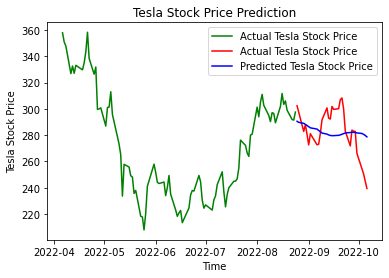

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
df = df.drop(labels=range(0, len(df.index)-30), axis=0) #127
df = df.reset_index()
df_date_test = df['Date']
df_date_test.index = pd.to_datetime(df['Date']);
df_date_test

df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
df = df.drop(labels=range(0, len(df.index)-127), axis=0) #127
df = df.reset_index()
df = df.drop(labels=range(len(df.index)-30, len(df.index)), axis=0) #127
df_date_train = df['Date']
df_date_train.index = pd.to_datetime(df['Date']);
df_date_train

# Load data
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
df = df.drop(labels=range(0, len(df.index)-127), axis=0) #127
df_date['Date'] = pd.to_datetime(df['Date']);

# Splitting data into training and testing sets
training_set = df.iloc[:len(df)-30, 1:7].values
testing_set = df.iloc[len(df)-30:, 1:7].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0:6])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

# Initializing the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 6)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making the predictions
dataset_total = df.iloc[:, 1:7]
inputs = dataset_total[len(dataset_total)-len(testing_set)-60:].values
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0:6])
X_test = np.array(X_test)

predicted_price_scaled = model.predict(X_test)

predicted_price_scaled_copies = np.repeat(predicted_price_scaled, training_set.shape[1], axis=-1)
predicted_price = sc.inverse_transform(predicted_price_scaled_copies)[:, 0]

# Visualizing the results
plt.plot(df_date_train.index,training_set[:,0], color='green', label='Actual Tesla Stock Price')
plt.plot(df_date_test.index,testing_set[:,0], color='red', label='Actual Tesla Stock Price')
plt.plot(df_date_test.index,predicted_price, color='blue', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
